In [3]:
pip install --upgrade pandas pyarrow


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB 5.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.5 MB 14.2 MB/s eta 0:00:01
   ----- ---------------------------------- 1.7/11.5 MB 11.7 MB/s eta 0:00:01
   ------------ --------------------------- 3.7/11.5 MB 19.6 MB/s eta 0:00:01
   --------------- ------------------------ 4.6/11.5 MB 19.5 MB/s eta 0:00:01
   --------------------- ------------------ 6.1/11.5 MB 21.6 MB/s eta 0:00:01
   ----------------------- ---------------- 6.9/11.5 MB 20.9 MB/s eta 0:00:01
   ---------------------------- ----------- 8.1/11.5 MB 20.7 MB/s eta 0:00:01
   --------------------------------- ------ 9.7/11.5 MB 22.9 MB/s eta 0:00:01
   ----------------------------------- ---- 10.2/11.5 MB 21.1 MB/s eta 0:00:01
   -------------------------------------- - 11.1/11.5 MB 22.6 MB/s eta 0:00:01
   ---------------------------------------  11.5/11.5 MB 21.1 MB/s eta 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.1.2 which is incompatible.


In [33]:
pip install eralchemy

  Obtaining dependency information for eralchemy from https://files.pythonhosted.org/packages/10/ba/3cdc8433aa3d4afc95dd302c2a21611b90cc5b3ebbff5a4889bf6b2e3bdd/eralchemy-1.5.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [34]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly.express as px
import os
from eralchemy import render_er
import sqlalchemy as sa

ERROR:root:either pygraphviz or graphviz should be installed


In [39]:
import subprocess

# Define the SQLite database file
database_path = 'basketball.sqlite'

# Use ERAlchemy to generate the ER diagram
subprocess.run(['eralchemy', '-i', f'sqlite:///{database_path}', '-o', 'er_diagram.png'])


CompletedProcess(args=['eralchemy', '-i', 'sqlite:///basketball.sqlite', '-o', 'er_diagram.png'], returncode=0)

In [3]:

db_path = 'basketball.sqlite'
connection = sql.connect(db_path)  # create connection object to database
print("SQL database connected")
table = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", connection)
print(table)


SQL database connected
                     name
0                  Player
1                    Team
2         Team_Attributes
3            Team_History
4       Player_Attributes
5          Game_Officials
6   Game_Inactive_Players
7             Team_Salary
8           Player_Salary
9                   Draft
10          Draft_Combine
11          Player_Photos
12            Player_Bios
13                   Game
14                   News
15           News_Missing


In [13]:
table_data = {}
for table_name in table["name"]:
    query = f"""
        SELECT 
            *
        FROM {table_name};
    """
    table_data[table_name] = pd.read_sql(query, connection)

# looking into the data

## player data set
- Shows if the player is active or not
- 0(inactive)= 3982   1 (active)= 519

In [15]:
table_data.keys()

dict_keys(['Player', 'Team', 'Team_Attributes', 'Team_History', 'Player_Attributes', 'Game_Officials', 'Game_Inactive_Players', 'Team_Salary', 'Player_Salary', 'Draft', 'Draft_Combine', 'Player_Photos', 'Player_Bios', 'Game', 'News', 'News_Missing'])

In [19]:
table_data["Player"]

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,0
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,0
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,0
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,0
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,0
...,...,...,...,...,...
4496,1627790,Ante Zizic,Ante,Zizic,1
4497,78647,Jim Zoet,Jim,Zoet,0
4498,78648,Bill Zopf,Bill,Zopf,0
4499,1627826,Ivica Zubac,Ivica,Zubac,1


In [22]:
table_data["Player"].describe()

,is_active
count,4501.000000
mean,0.115308
std,0.319428
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [20]:
table_data["Player"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4501 entries, 0 to 4500
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4501 non-null   object
 1   full_name   4501 non-null   object
 2   first_name  4501 non-null   object
 3   last_name   4501 non-null   object
 4   is_active   4501 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 175.9+ KB


In [32]:
table_data["Player"]["is_active"].value_counts()

0    3982
1     519
Name: is_active, dtype: int64

In [71]:
Player_Attributes = table_data["Player_Attributes"]

In [73]:
Player_Attributes.head()

,ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,PTS,AST,REB,ALL_STAR_APPEARANCES,PIE
0,76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24T00:00:00,Duke,USA,...,Y,Y,1990,1,25,5.7,0.3,3.3,0.0,NaN
1,76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07T00:00:00,Iowa State,USA,...,Y,Y,1968,1,5,9.0,1.2,8.0,0.0,NaN
2,76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16T00:00:00,UCLA,USA,...,Y,Y,1969,1,1,24.6,3.6,11.2,18.0,NaN
3,51,Mahmoud,Abdul-Rauf,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",M. Abdul-Rauf,mahmoud-abdul-rauf,1969-03-09T00:00:00,Louisiana State,USA,...,Y,Y,1990,1,3,14.6,3.5,1.9,0.0,NaN
4,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03T00:00:00,San Jose State,France,...,Y,Y,1997,1,11,7.8,1.1,3.3,0.0,NaN


In [53]:
table_data["Player_Attributes"].describe()

,HEIGHT,WEIGHT,SEASON_EXP,PTS,AST,REB,ALL_STAR_APPEARANCES,PIE
count,4403.000000,4399.000000,4500.000000,4485.000000,4485.000000,4193.000000,4056.000000,429.000000
mean,78.070634,211.146852,4.295556,6.357101,1.436299,2.981588,0.343195,0.084002
std,3.638698,27.075019,4.492292,4.925010,1.409078,2.288022,1.474006,0.088903
min,65.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000
25%,75.000000,190.000000,1.000000,2.800000,0.500000,1.400000,0.000000,0.067000
50%,78.000000,210.000000,3.000000,5.100000,1.000000,2.400000,0.000000,0.089000
75%,81.000000,230.000000,7.000000,8.600000,1.900000,4.000000,0.000000,0.112000
max,91.000000,360.000000,22.000000,31.800000,11.200000,22.900000,18.000000,0.211000


In [54]:
table_data["Player_Attributes"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                4500 non-null   object 
 1   FIRST_NAME                        4500 non-null   object 
 2   LAST_NAME                         4500 non-null   object 
 3   DISPLAY_FIRST_LAST                4500 non-null   object 
 4   DISPLAY_LAST_COMMA_FIRST          4500 non-null   object 
 5   DISPLAY_FI_LAST                   4500 non-null   object 
 6   PLAYER_SLUG                       4500 non-null   object 
 7   BIRTHDATE                         4500 non-null   object 
 8   SCHOOL                            4497 non-null   object 
 9   COUNTRY                           4500 non-null   object 
 10  LAST_AFFILIATION                  4500 non-null   object 
 11  HEIGHT                            4403 non-null   float64
 12  WEIGHT

<Axes: >

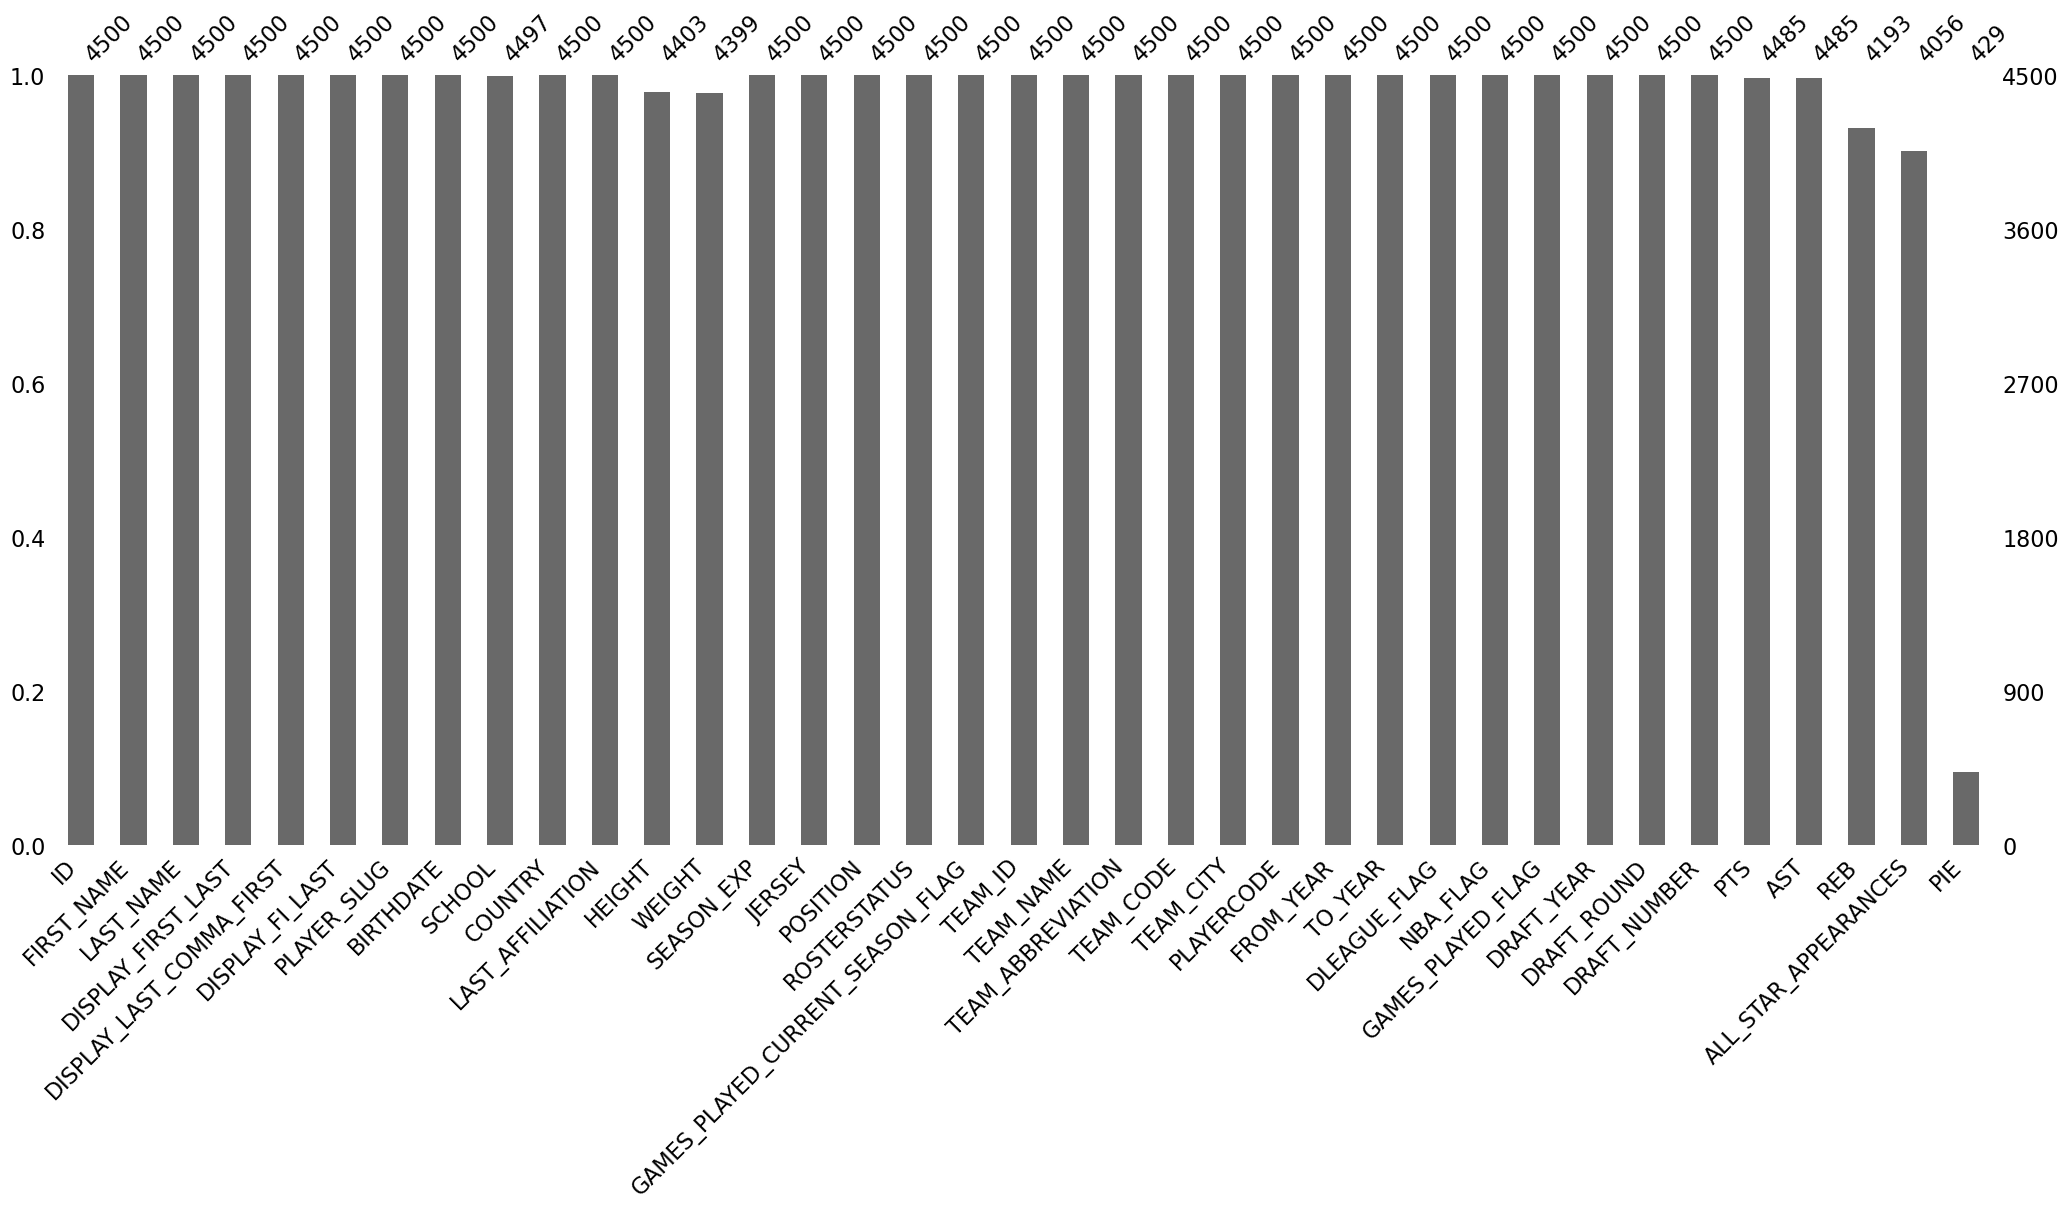

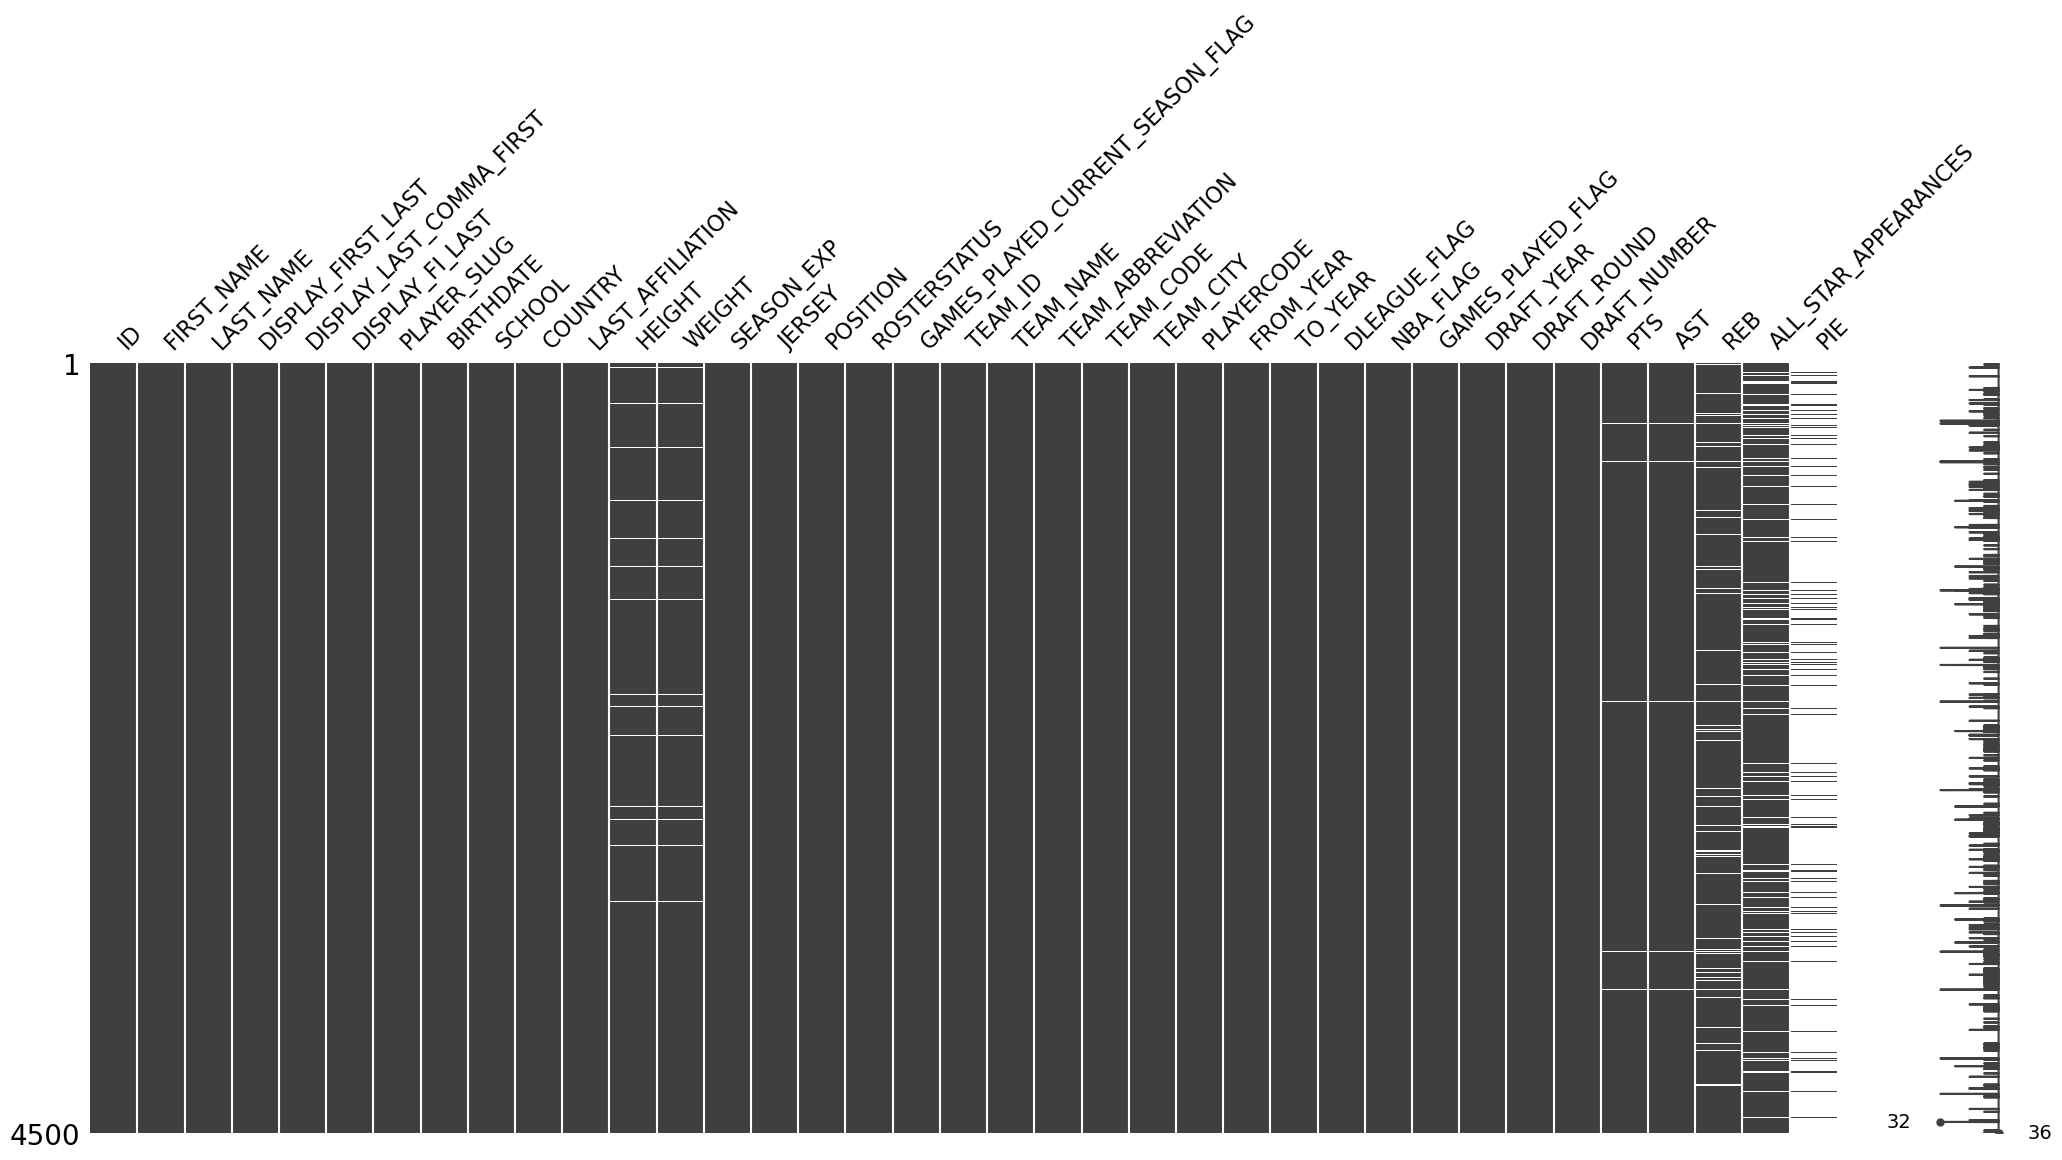

In [70]:
import missingno as msno
msno.bar(table_data["Player_Attributes"])
msno.matrix(table_data["Player_Attributes"])

In [74]:
Player_Attributes[["HEIGHT","WEIGHT","DRAFT_YEAR"]]

,HEIGHT,WEIGHT,DRAFT_YEAR
0,82.0,240.0,1990
1,81.0,235.0,1968
2,86.0,225.0,1969
3,73.0,162.0,1990
4,78.0,235.0,1997
...,...,...,...
4495,82.0,266.0,2016
4496,85.0,240.0,Undrafted
4497,73.0,170.0,1970
4498,84.0,240.0,2016
